/var/folders/lx/5td2g65s51s2qn_zywp584340000gn/T/ipykernel_78045/1066856556.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation["Status_Label"] = annotation["Status"].map({0: "Alive", 1: "Deceased"})


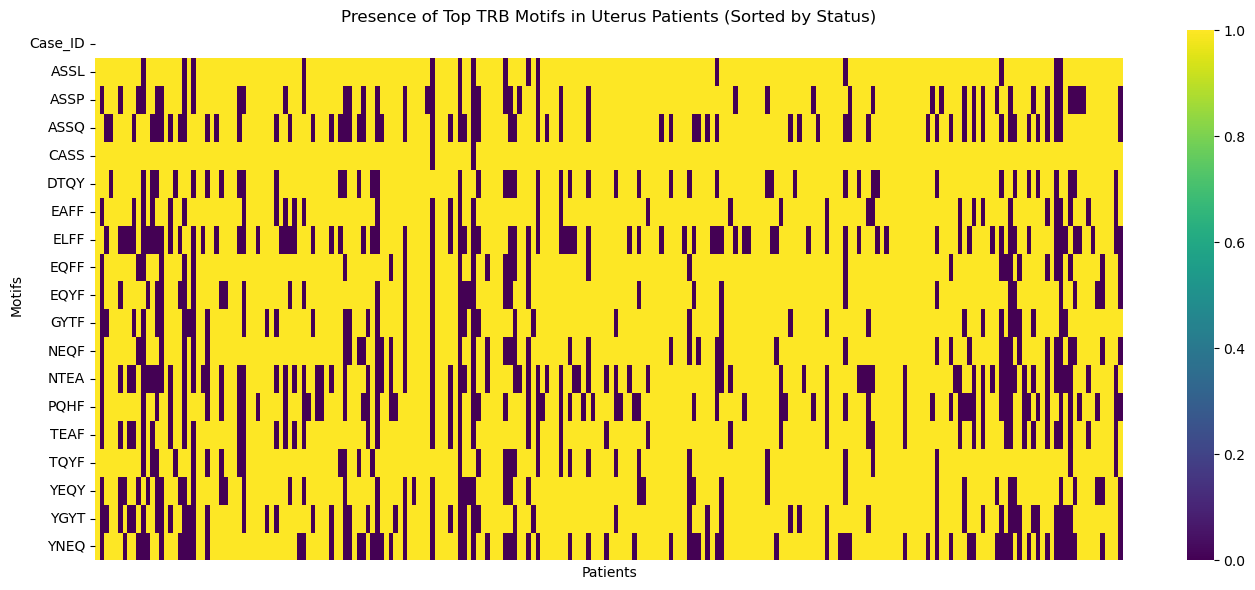

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your binary matrix with OS_days and Status
df = pd.read_csv("/Users/tusharsingh/Desktop/motifs_may/may24/output/TRB/shared_motifs/shared_motifs_4k/single/preclic/uterus_trb_survival_ready.csv")

# Optional: if you have a patient ID column, drop it
df = df.drop(columns=["Patient_ID"], errors="ignore")  # Only if present

# Separate annotations and motifs
annotation = df[["Status"]]
motif_matrix = df.drop(columns=["OS_days", "Status"])

# Convert to numeric just in case
motif_matrix = motif_matrix.apply(pd.to_numeric, errors='coerce')

# Sort by status
annotation["Status_Label"] = annotation["Status"].map({0: "Alive", 1: "Deceased"})
sorted_df = motif_matrix.copy()
sorted_df["Status"] = annotation["Status"]
sorted_df = sorted_df.sort_values("Status", ascending=False).drop(columns="Status")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(sorted_df.T, cmap="viridis", cbar=True, xticklabels=False)
plt.title("Presence of Top TRB Motifs in Uterus Patients (Sorted by Status)")
plt.xlabel("Patients")
plt.ylabel("Motifs")
plt.tight_layout()
plt.savefig("fig6_uterus_motif_heatmap.png", dpi=300)
plt.show()


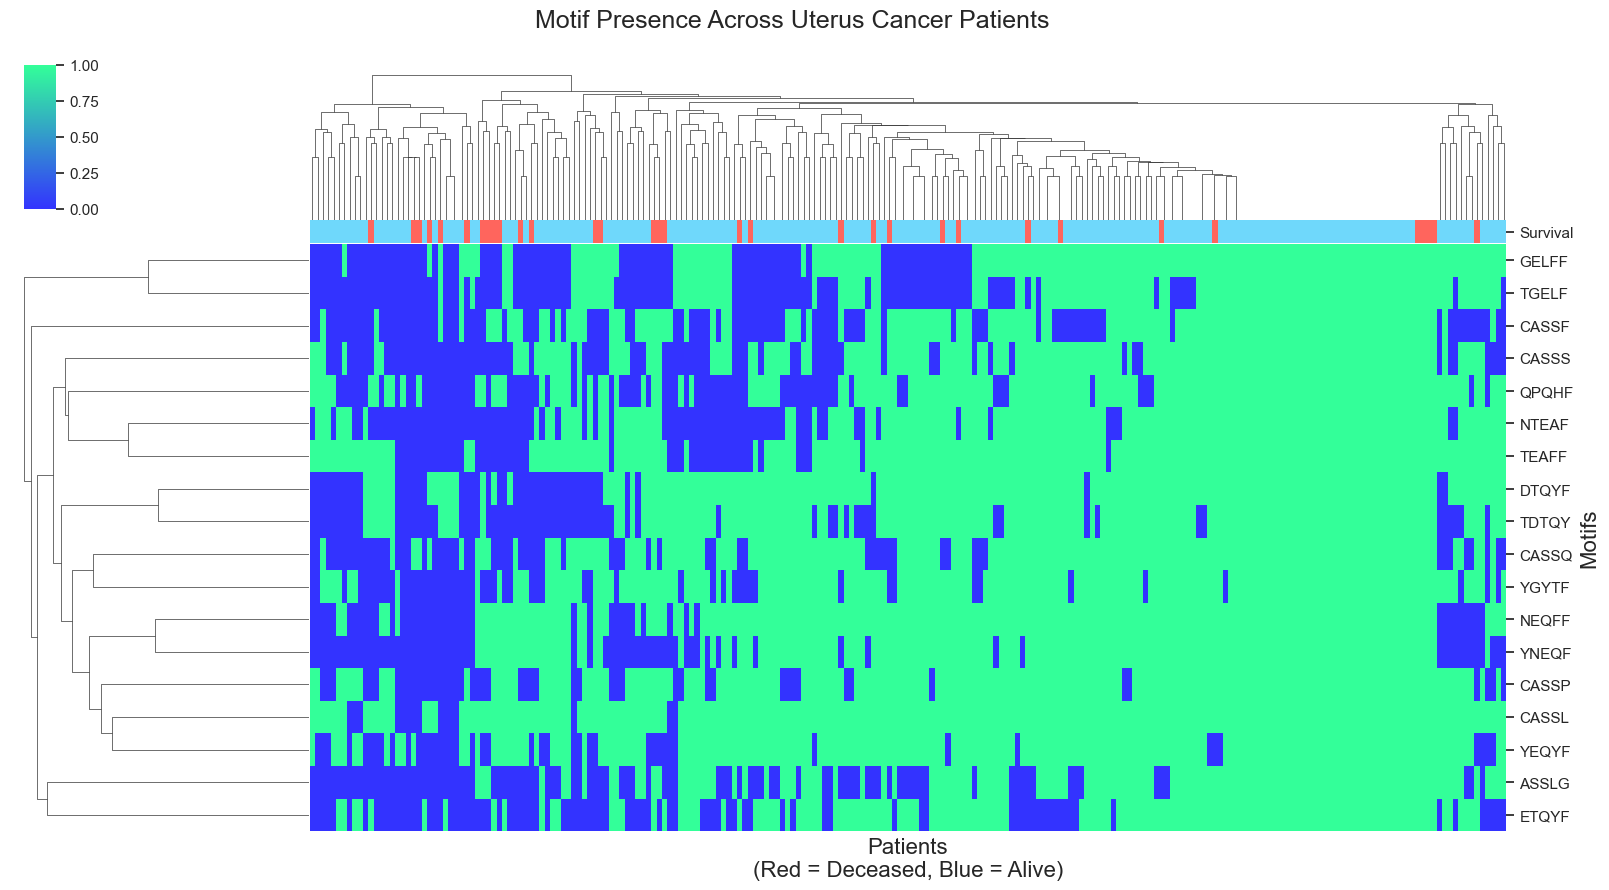

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the data ---
df = pd.read_csv("/Users/tusharsingh/Desktop/motifs_may/may24/output/TRB/shared_motifs/shared_motifs_5k/preclic/uterus_trb_survival_ready.csv")

# Drop ID if present
df = df.drop(columns=["Case_ID"], errors="ignore")

# Separate survival and motif data
status = df["Status"]
motif_matrix = df.drop(columns=["OS_days", "Status"])

# Convert motif matrix to numeric (just in case)
motif_matrix = motif_matrix.apply(pd.to_numeric, errors="coerce")

# --- Sort patients by survival status ---
sorted_index = status.sort_values(ascending=False).index
motif_matrix_sorted = motif_matrix.loc[sorted_index]

# Create color labels for patient status (used as top annotation)
col_colors = status.loc[sorted_index].map({0: "#4bcffa", 1: "#ff3f34"}).to_frame()
col_colors.columns = ["Survival"]

# --- Plot clustermap ---
sns.set(style="white")
g = sns.clustermap(
    motif_matrix_sorted.T,
    cmap="winter",
    col_colors=col_colors,
    figsize=(16, 8),
    xticklabels=False,
    yticklabels=True,
    cbar_pos=(0.02, 0.8, 0.02, 0.18)  # Shrink colorbar, optional
, alpha=0.8
)

# --- Titles & Labels ---
g.fig.suptitle("Motif Presence Across Uterus Cancer Patients", y=1.05, fontsize=18)
g.ax_heatmap.set_xlabel("Patients\n(Red = Deceased, Blue = Alive)", fontsize=16)
g.ax_heatmap.set_ylabel("Motifs", fontsize=16)

# Save plot
plt.savefig("fig6_uterus_motif_heatmap_clustered_5mer.png", dpi=300, bbox_inches="tight")
plt.show()


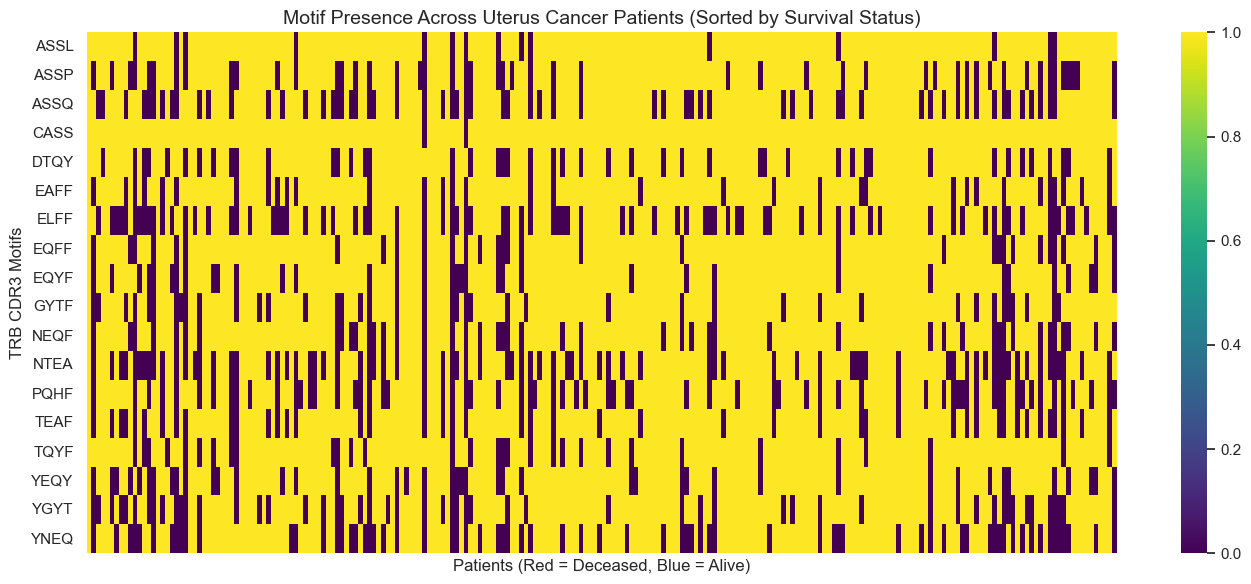

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/tusharsingh/Desktop/motifs_may/may24/output/TRB/shared_motifs/shared_motifs_4k/single/preclic/uterus_trb_survival_ready.csv")
df = df.drop(columns=["Case_ID"], errors="ignore")

# Separate metadata and motif matrix
status = df["Status"]
motif_matrix = df.drop(columns=["OS_days", "Status"]).apply(pd.to_numeric, errors="coerce")

# Sort patients by status (deceased first)
sorted_index = status.sort_values(ascending=False).index
motif_matrix_sorted = motif_matrix.loc[sorted_index]

# Create survival color bar
col_colors = status.loc[sorted_index].map({0: "lightblue", 1: "crimson"})

# Plot heatmap (no clustering)
plt.figure(figsize=(14, 6))
sns.heatmap(
    motif_matrix_sorted.T,
    cmap="viridis",
    cbar=True,
    xticklabels=False,
    yticklabels=True
)

# Annotate
plt.title("Motif Presence Across Uterus Cancer Patients (Sorted by Survival Status)", fontsize=14)
plt.xlabel("Patients (Red = Deceased, Blue = Alive)")
plt.ylabel("TRB CDR3 Motifs")

# Optional: add color bar manually above plot
for i, color in enumerate(col_colors):
    plt.gca().add_patch(plt.Rectangle((i, -1), 1, 0.5, color=color, linewidth=0))

plt.tight_layout()
plt.savefig("fig6_heatmap_no_clustering.png", dpi=300)
plt.show()
